In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [11]:
#Target Distribution
df['isFraud'].value_counts()
df['isFraud'].value_counts(normalize=True) * 100

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

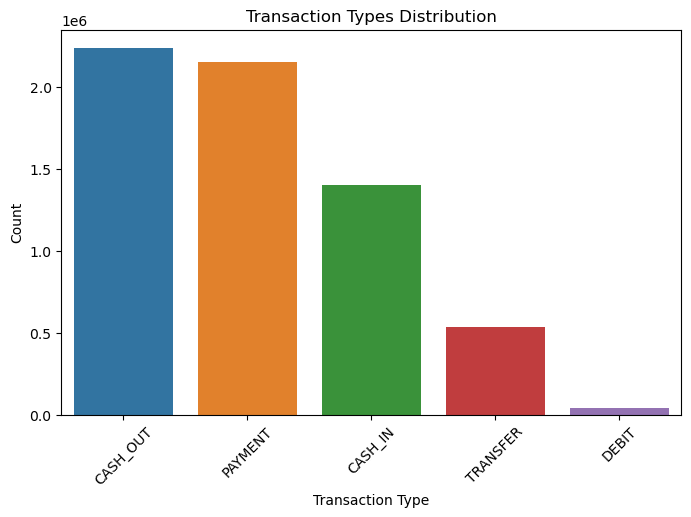

In [12]:
#Transaction Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Transaction Types Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

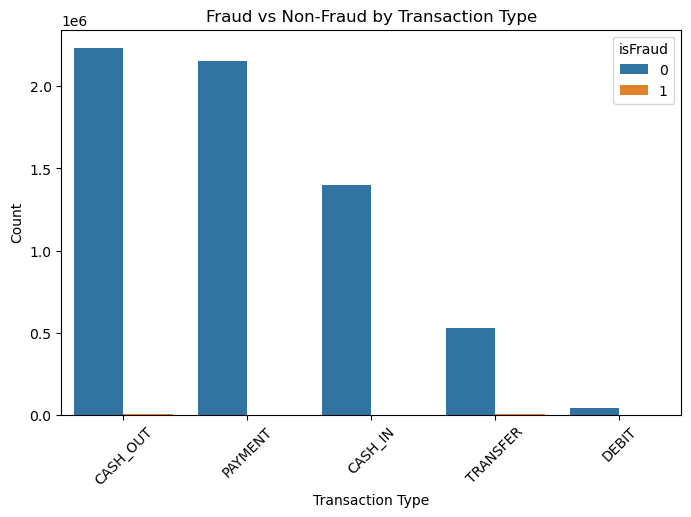

In [14]:
#Fraud Count by Transaction Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', hue=df['isFraud'].astype(str), order=df['type'].value_counts().index)
plt.title('Fraud vs Non-Fraud by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='isFraud')
plt.xticks(rotation=45)
plt.show()

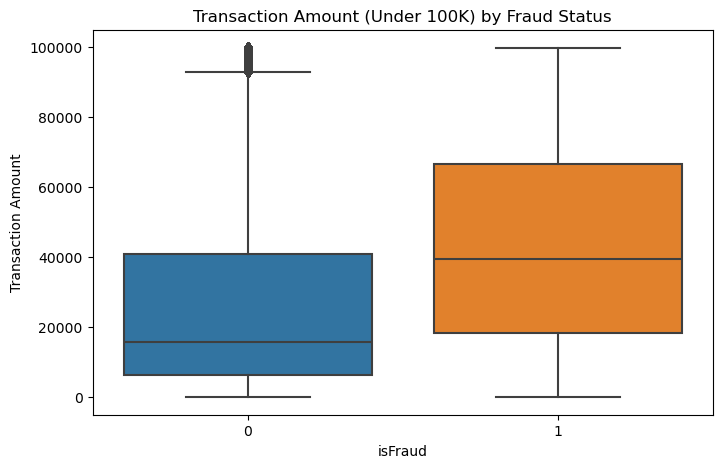

In [15]:
#Amount Distribution – Fraud vs Non-Fraud
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df['amount'] < 100000], x='isFraud', y='amount')
plt.title('Transaction Amount (Under 100K) by Fraud Status')
plt.xlabel('isFraud')
plt.ylabel('Transaction Amount')
plt.show()

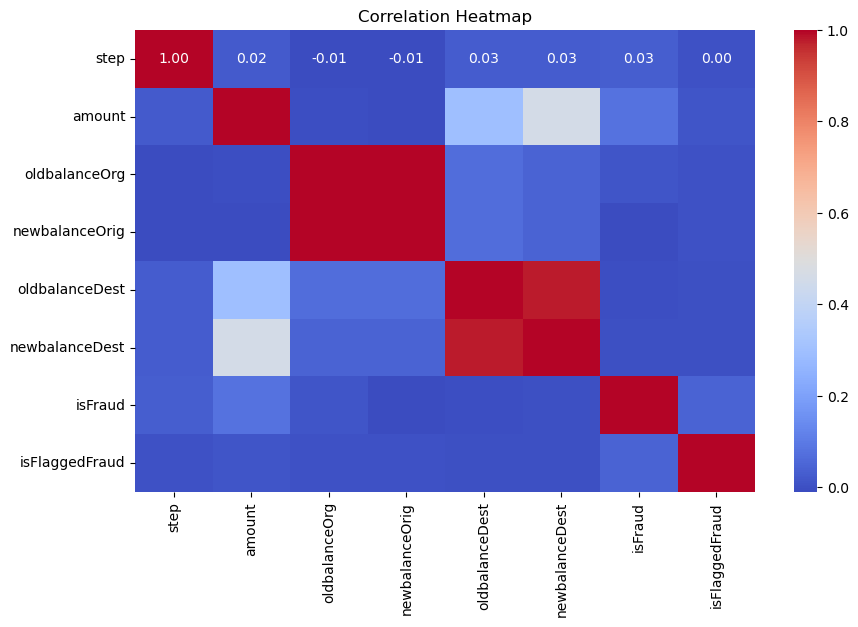

In [16]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#Drop Unnecessary Columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [18]:
# Balance difference for origin and destination
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Errors between amount and balance changes
df['errorOrig'] = df['amount'] - df['balanceDiffOrig']
df['errorDest'] = df['amount'] - df['balanceDiffDest']

In [19]:
#One Hot Encoding 
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   amount           float64
 2   oldbalanceOrg    float64
 3   newbalanceOrig   float64
 4   oldbalanceDest   float64
 5   newbalanceDest   float64
 6   isFraud          int64  
 7   isFlaggedFraud   int64  
 8   balanceDiffOrig  float64
 9   balanceDiffDest  float64
 10  errorOrig        float64
 11  errorDest        float64
 12  type_CASH_OUT    bool   
 13  type_DEBIT       bool   
 14  type_PAYMENT     bool   
 15  type_TRANSFER    bool   
dtypes: bool(4), float64(9), int64(3)
memory usage: 606.8 MB


In [22]:
#Define Features (X) and Target (y)
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [26]:
#Undersample majority class (class 0)
fraud_df = df[df['isFraud'] == 1]
nonfraud_df = df[df['isFraud'] == 0].sample(n=100000, random_state=42)  # take 100k samples

In [27]:
#Combine for balanced base
df_balanced = pd.concat([fraud_df, nonfraud_df], axis=0)

In [28]:
#Redefine X and y
X = df_balanced.drop('isFraud', axis=1)
y = df_balanced['isFraud']

In [29]:
#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [30]:
#apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [33]:
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

In [34]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# AUC Score
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[27294  2706]
 [  238  2226]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9914    0.9098    0.9488     30000
           1     0.4513    0.9034    0.6019      2464

    accuracy                         0.9093     32464
   macro avg     0.7213    0.9066    0.7754     32464
weighted avg     0.9504    0.9093    0.9225     32464


ROC AUC Score: 0.9611810200216451


In [35]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the model
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # to handle imbalance
    random_state=42,
    n_jobs=-1                 # use all CPU cores for faster training
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [36]:
# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [37]:
# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
[[29998     2]
 [   12  2452]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     30000
           1     0.9992    0.9951    0.9972      2464

    accuracy                         0.9996     32464
   macro avg     0.9994    0.9975    0.9985     32464
weighted avg     0.9996    0.9996    0.9996     32464


ROC AUC Score: 0.9989410037878788


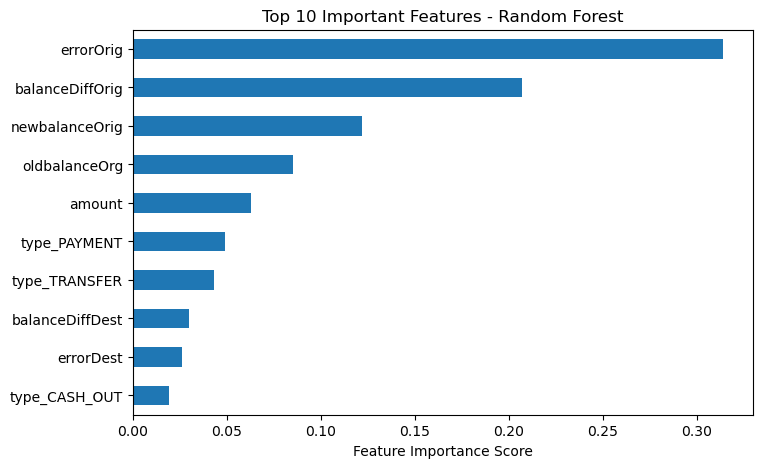

In [38]:
#Feature Importance 
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [39]:
#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {'n_estimators': [100, 200, 300],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],'bootstrap': [True, False]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

random_search = RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=10,scoring='f1',cv=3,verbose=2,random_state=42,
    n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

# Use the best model
best_rf = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict using the tuned model
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, digits=4))

# ROC AUC Score
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_best))

Confusion Matrix:
[[29997     3]
 [   12  2452]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     30000
           1     0.9988    0.9951    0.9970      2464

    accuracy                         0.9995     32464
   macro avg     0.9992    0.9975    0.9984     32464
weighted avg     0.9995    0.9995    0.9995     32464


ROC AUC Score: 0.998986444805195


In [ ]:
## 1. Data Cleaning: Missing Values, Outliers, and Multi-Collinearity

#-Missing Values: No missing values were found (`df.isnull().sum()` showed all zeros). However, balance-related fields like `oldbalanceDest` and `newbalanceDest` were often zero for merchants (IDs starting with "M"), which is expected based on the data documentation.
#-Outliers: Outliers were detected in the `amount` column (ranged up to millions). Since fraud often involves large values, outliers were not removed but were preserved as critical fraud indicators.
#-Multi-Collinearity: Feature correlation was checked using a heatmap. While some features like `oldbalanceOrg` and `newbalanceOrig` were highly correlated, they were kept after engineering new derived features (`balanceDiffOrig`, `errorOrig`) to improve model expressiveness.



## 2. Fraud Detection Model Description

#- A `RandomForestClassifier` was selected as the final model due to its ability to handle large datasets, complex patterns, and imbalanced classes with `class_weight='balanced'`.
#- Class imbalance was addressed using both stratified train-test splitting and built-in class weighting.
#- The model was further tuned using `RandomizedSearchCV` for hyperparameter optimization.
#- Alternative models like Logistic Regression were used for benchmarking, but Random Forest achieved significantly better performance.


## 3. Variable (Feature) Selection

#- Dropped non-informative columns: `nameOrig` and `nameDest` (IDs).
#- One-hot encoded the `type` column to represent transaction types (`TRANSFER`, `CASH_OUT`, etc.).
#- Engineered features:
 # - `balanceDiffOrig` = `oldbalanceOrg` - `newbalanceOrig`
  #- `balanceDiffDest` = `newbalanceDest` - `oldbalanceDest`
  #- `errorOrig` = transaction error in sender's balance
  #- `errorDest` = transaction error in receiver's balance
#- These derived features enhanced the model’s ability to detect inconsistencies related to fraudulent activity.


##  4. Model Performance Evaluation

#Final model: Tuned Random Forest

#- Accuracy: 99.95%
#- Precision (Fraud): 99.88%
#- Recall (Fraud): 99.51%
#- F1-Score (Fraud): 99.70%
#- ROC AUC: 99.89%
#- Very low false negatives (missed frauds) and extremely low false positives.

#Visual tools used:
#- Confusion Matrix (Seaborn heatmap)
#- ROC AUC Score
#- Feature Importance plot

##  5. Key Factors That Predict Fraudulent Transactions

#Top predictors from the Random Forest model:
#1. type_TRANSFER and type_CASH_OUT – most frauds occur through these types
#2. amount – high transaction amounts strongly correlate with fraud
#3. errorOrig – large error in origin account balance suggests fraud
#4. balanceDiffOrig – unexpected changes in sender’s balance
#5. errorDest – balance mismatch in the destination account


## 6. Do These Factors Make Sense?

#Yes — these features align with real-world fraud behavior:
#- Fraudulent agents often transfer large sums and then cash out.
#- If the balance deduction does not match the amount, it's suspicious.
#- Merchants (with zero balances) involved in high-value transactions often indicate laundering-type frauds.


##  7. Infrastructure-Level Fraud Prevention Recommendations

#To prevent fraud proactively, the company should:
#- Implement real-time fraud detection systems using trained ML models.
#- Enforce transaction thresholds and flag transfers over certain limits.
#- Enable two-factor authentication for high-risk transaction types (`TRANSFER`, `CASH_OUT`).
#- Monitor anomalies in balance patterns and destination account behavior.
#- Integrate feedback loops to continuously improve detection accuracy.


## 8. How to Evaluate If These Actions Work?

#To assess effectiveness post-implementation:
#- Track fraud detection metrics (e.g., Precision, Recall, F1-Score) over time.
#- Compare fraud rate before vs. after system upgrades.
#- Monitor number of customer fraud complaints or chargebacks.
#- Conduct A/B testing between current and upgraded infrastructure versions.
#- Analyze false positives vs. true frauds caught over multiple time windows.